# Linear classification

## Fisher's linear discriminant with equal class covariance

This geometric method does not make probabilistic assumption, it only relies on distances. It look for the **linear projection** (rotation) $\mathbf{w}$ that maximizes the between / within variance ratio: noted $F(w)$. It should be considered as a pedagogical experimental method. However with few assumptions it will provide the same results than Linear discriminant analysis (LDA) explained below.

Suppose two classes ($C_0, C_1$) of observations have means $\mu_0$, $\mu_1$ and the same the 
total within-class scatter ``covariance'' matrix $S_W$ given by:
\begin{align}
S_W &= \sum_{i\in C_0} (x_i - \mu_0)(x_i - \mu_0)^T + \sum_{j\in C_1} (x_j - \mu_1)(x_j -\mu_1)^T\\
    &= X_c^T X_c
\end{align}

Where $X_c$ is the $(N \times P)$ matrix of data centered on their respective means:

$$
X_c = 
\begin{bmatrix}
X_0 -  \mu_0 \\ X_1 -  \mu_1 
\end{bmatrix}
$$

Where $X_0$ and $X_1$ are the $(N_0 \times P)$ and $(N_1 \times P)$ matrices of samples of classes $C_0$ and $C_1$.

Let $S_B$ being the scatter ``between-class'' covariance matrix and given by

$$
S_B = (\mu_1 - \mu_0 )(\mu_1 - \mu_0 )^T
$$


The linear combination of features $w^T x$ have means $w^T \mu_i$ for i=0,1 and variance $w^T 
X^T_c X_c w$. Fisher defined the separation between these two distributions to be the ratio of the 
variance between the classes to the variance within the classes:

\begin{align}
F_{\text{Fisher}}(w) &= \frac{\sigma_{\text{between}}^2}{\sigma_{\text{within}}^2}\\
                     &= \frac{(w^T \mu_1 - w^T \mu_0)^2}{w^T  X^T_c X_c w}\\
                     &= \frac{(w^T (\mu_1 - \mu_0))^2}{w^T  X^T_c X_c w}\\ 
                     &= \frac{w^T (\mu_1 - \mu_0) (\mu_1 - \mu_0)^T w}{w^T X^T_c X_c w}\\
                     &= \frac{w^T S_B w}{w^T S_W w}
\end{align}

### The Fisher most discriminant projection

In the two classes case, the maximum separation occurs by a projection on the $(\mu_1 - \mu_0)$ using the Mahalanobis 
metric $S_B^{-1}$:

$$
    w \propto S_B^{-1}(\mu_1 - \mu_0)
$$

#### Demonstration

Differentiating $F_{Fisher}(w)$ with respect to $w$

\begin{align*}
\nabla_{w}F_{Fisher}(w) &= 0\\
\nabla_{w}(\frac{w^T S_B w}{w^T S_W w}) &= 0\\
(w^T S_W w)(2 S_B w) - (w^T S_B w)(2 S_W w) &= 0\\
(w^T S_W w)(S_B w) &= (w^T S_B w)(S_W w)\\
S_B w &= \frac{w^T S_B w}{w^T S_W w}(S_W w)\\
S_B w &= \lambda (S_W w)\\
S_W^{-1}{S_B} w &= \lambda  w\\
\end{align*}

Since we do not care about the magnitude of $w$, only its direction, we replaced the scalar factor $(w^T S_B w) / (w^T S_W w)$ by $\lambda$. 

In the multiple $K$-classes case, the solutions $w$ are determined by the eigenvectors of $S_W^{-1}{S_B}$ that correspond to the ($K-1$) largest eigenvalues.

However, in the two classes case (where $S_B = (\mu_1 - \mu_0 )(\mu_1 - \mu_0 )^T$) it is easy to 
show that $w = S_W^{-1}(\mu_1 - \mu_0)$ is the unique eigenvector of $S_W^{-1}{S_B}$:

\begin{align*}
S_W^{-1}(\mu_1 - \mu_0 )(\mu_1 - \mu_0 )^T w &= \lambda  w\\
S_W^{-1}(\mu_1 - \mu_0 )(\mu_1 - \mu_0 )^T S_W^{-1}(\mu_1 - \mu_0) &= \lambda  S_W^{-1}(\mu_1 
- \mu_0)\\
\end{align*}

Where here $\lambda = (\mu_1 - \mu_0 )^T S_W^{-1}(\mu_1 - \mu_0)$. Which leads to the result:
$$
    w \propto S_B^{-1}(\mu_1 - \mu_0)
$$

### The separating hyperplane

The separating hyperplane is a plan $P-1$-dimensional hyper surface orthogonal to the projection vector: $w$. To define the origin of the plane along $w$. This origin is the classification threshold to decide whether a point should be classified $C_0$ or $C_1$. The threshold can be chosen as the hyperplane between projections of the two means:
$$
T = w \cdot \frac{1}{2}(\mu_1 - \mu_0)
$$

![The Fisher most discriminant projection](images/fisher_linear_disc.png)

## Linear discriminant analysis (LDA)

Linear discriminant analysis (LDA) is a probabilistic generalization of Fisher's linear discriminant. It uses Bayes' rule to fix the threshold based on prior probabilities of classes.

TO BE COMPLETED USING BAYES FORMULA

Nb errors=10, error rate=0.05


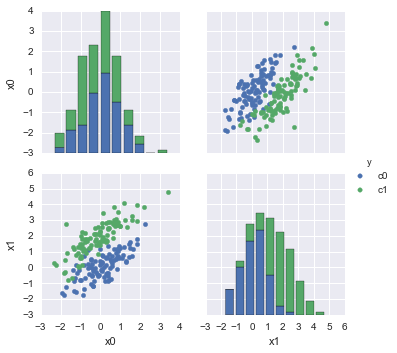

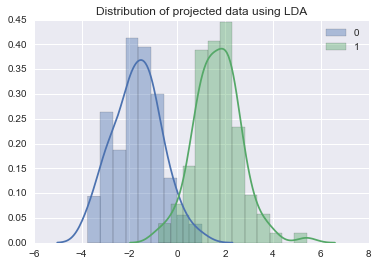

In [2]:
%matplotlib inline

import numpy as np
from sklearn.lda import LDA

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Dataset
n_samples, n_features = 100, 2
mean0, mean1 = np.array([0, 0]), np.array([0, 2])
Cov = np.array([[1, .8],[.8, 1]])
np.random.seed(42)
X0 = np.random.multivariate_normal(mean0, Cov, n_samples)
X1 = np.random.multivariate_normal(mean1, Cov, n_samples)
X = np.vstack([X0, X1])
y = np.array([0] * X0.shape[0] + [1] * X1.shape[0])

# LDA with scikit-learn
lda = LDA()
proj = lda.fit(X, y).transform(X)
y_pred = lda.predict(X)

errors =  y_pred != y
print("Nb errors=%i, error rate=%.2f" % (errors.sum(), errors.sum() / len(y_pred)))

# Use pandas & seaborn for convinience
data = pd.DataFrame(dict(x0=X[:, 0], x1=X[:, 1], y=["c"+str(v) for v in y]))
plt.figure()
g = sns.PairGrid(data, hue="y")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

plt.figure()
for lab in np.unique(y):
    sns.distplot(proj.ravel()[y == lab], label=str(lab))

plt.legend()
plt.title("Distribution of projected data using LDA")

## Logistic regression